# Fantasy Premier League 2021/2022 Season Analysis:

**This notebook covers how to access the Fantasy Premier League API, build a dataframe, and analyze  the data using Jupyter, Python, Pandas, and Matplotlib.**

**About the game**: Each FPL manager is given a starting budget of £100 million and must pick a total of 15 players: two goalkeepers, five defenders, five midfielders and three forwards. You are limited to a maximum of three players from each Premier League team. Players in your team score points based on real-life performances with the biggest contributors being goals, assists and cleansheets.

**Analysis Limits**: The data used in this notebook includes all season totals at the end of Gameweek 38 of the 2021/2022 season. This is more of a season overview analysis than a week-to-week analysis, therefore, form and fixtures were not accounted for. The prices used are provided by the FPL API and have already changed to 2022/2023 prices. I have created a 'price range' category to make the analysis more accurate as price changes generally happen within their price range.

## 1. Data Loading

First, we import the necessary libraries that we will use throughout the analysis. We then use the requests library retrieve data via the FPL API endpoint. (https://fantasy.premierleague.com/api/bootstrap-static/). The next step is to convert the response data into a json object and then again into a pandas Dataframe. 


In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
elements_df = pd.read_csv('data/20_21_season_data/elements.csv')
elements_types_df = pd.read_csv('data/21_22_season_data/element_types.csv')
teams_df = pd.read_csv('data/20_21_season_data/teams.csv')

In [3]:
elements_df = elements_df.iloc[:,1:]
teams_df = teams_df.iloc[:,1:]
elements_types_df = elements_types_df.iloc[:,1:]

## 2. Data Cleaning

The next step involves cleaing the data

### Understand data

In [4]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,NaN,NaN,80201,0,0,0,0,0,1,3.5,...,327,4,198,13,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,115918,0,0,0,0,0,1,2.0,...,340,13,357,32,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,47431,0,0,0,0,0,3,3.2,...,146,85,124,71,1.0,NaN,2.0,NaN,NaN,NaN
3,NaN,NaN,54694,0,0,0,0,0,4,4.2,...,32,16,50,18,NaN,NaN,NaN,NaN,1.0,NaN
4,NaN,NaN,58822,0,0,0,0,0,2,2.7,...,265,87,295,101,NaN,NaN,5.0,NaN,NaN,NaN


In [5]:
elements_df.shape

(492, 67)

In [6]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

### Data Tansformation

Get only the interesting columns for analysis

In [7]:
cols = ['element_type', 'first_name', 'now_cost', 'points_per_game',
       'second_name', 'selected_by_percent', 'team', 'total_points',
        'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'creativity_rank', 'threat_rank', 
        'ict_index_rank']

df = elements_df[cols]

Check data type

In [8]:
df.dtypes

element_type             int64
first_name              object
now_cost                 int64
points_per_game        float64
second_name             object
selected_by_percent    float64
team                     int64
total_points             int64
value_season           float64
web_name                object
minutes                  int64
goals_scored             int64
assists                  int64
clean_sheets             int64
goals_conceded           int64
saves                    int64
bonus                    int64
bps                      int64
influence              float64
creativity             float64
threat                 float64
ict_index              float64
influence_rank           int64
creativity_rank          int64
threat_rank              int64
ict_index_rank           int64
dtype: object

In [9]:
cols = ['points_per_game', 'selected_by_percent', 'value_season', 
        'influence', 'creativity', 'threat', 'ict_index']

df[cols] = df.loc[:, tuple(cols)].astype('float32')

C:\Users\Luto Sibotoboto\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
elements_types_df.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],52
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],192
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],226
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],58


In [11]:
# Add position attrribute
pos_dict = dict(zip(elements_types_df['id'], elements_types_df['singular_name']))
df.loc[:, 'position'] = df.loc[:,'element_type'].apply(lambda x: pos_dict[x])

#Map team to team name
team_codes =list(df['team'].unique())
team_names = list(teams_df['short_name'].unique())
teams_dict = dict(zip(team_codes, team_names))

df.loc[:, 'team'] = df.loc[:,'team'].apply(lambda x: teams_dict[x])

#Create cost column
df.loc[:, 'price'] = df.loc[:,'now_cost'] / 10

#Create G+A column

df.loc[:, 'G+A'] = df.loc[:,'goals_scored'] + df.loc[:,'assists']

C:\Users\Luto Sibotoboto\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Luto Sibotoboto\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Drop uninteresting columns

In [12]:
df = df.drop(['element_type', 'now_cost'], axis=1)

Check for duplicated rows

In [13]:
df.duplicated().sum()

0

Discretization and Binning

In [14]:
df['position'].value_counts().index

Index(['Midfielder', 'Defender', 'Forward', 'Goalkeeper'], dtype='object')

In [15]:
#Create labels
labels = ['Budget', 'Mid', 'Premium']

#Create bins
gk_bins = [4.0, 5.0, 6.0, 7.0]
def_bins = [4.0, 5.0, 6.0, 8.0]
mid_bins = [4.0, 6.0, 9.0, 14.0]
for_bins = [4.0, 6.0, 9.0, 14.0]

#Create list of tuples
tup = [(df, gk_bins, 'Goalkeeper', labels),
       (df, def_bins, 'Defender', labels),
       (df, mid_bins, 'Midfielder', labels),
       (df, for_bins, 'Forward', labels)
       ]

#Discretinization function
def categorize_price(dataframe, bins, position, labels):
    grp = dataframe.groupby(['position']).get_group(position)
    grp_prices = grp['price']
    grp.loc[:,'price_range'] = pd.cut(grp_prices, bins, labels=labels, right=False)
    
    grp_lst.append(grp)
    return grp

#Create grp_list
grp_lst = list()

for item in tup:
    df = item[0]
    bins = item[1]
    pos = item[2]
    labels = item[3]
    categorize_price(df, bins, pos, labels)
    
frames = grp_lst
df = pd.concat(frames)


In [16]:
#Create labels
labels = ['Differential', 'High']

#Create bins
selected_by = [0.0, 15.0, 99.0]

#Create list of tuples
tup = (df, selected_by, labels)

#Discretinization function
def categorize_own(dataframe, bins, labels):
    ownership = dataframe['selected_by_percent']
    dataframe['ownership'] = pd.cut(ownership, bins, labels=labels, right=False)

    return dataframe

df = categorize_own(df, selected_by, labels)

### Handle missing data

In [17]:
df.isnull().sum()

first_name             0
points_per_game        0
second_name            0
selected_by_percent    0
team                   0
total_points           0
value_season           0
web_name               0
minutes                0
goals_scored           0
assists                0
clean_sheets           0
goals_conceded         0
saves                  0
bonus                  0
bps                    0
influence              0
creativity             0
threat                 0
ict_index              0
influence_rank         0
creativity_rank        0
threat_rank            0
ict_index_rank         0
position               0
price                  0
G+A                    0
price_range            0
ownership              0
dtype: int64

### Save clean data

In [18]:
df.to_csv('data/20_21_season_data/fpl_clean.csv', index=False)

## 3. Exploratory Data Analysis

The goal of this exploratory data analysis is to derive insights into which metrics contribute to high points totals. The FPL API provides the same statistics that are available on the transfer page. I have added extra attributes to aid in my analysis during the preprocessing stage.

The difficult part of the game is getting the right players in at the right time (when they hit 'form'). This analysis will be limited by the fact that 'form' data is not yet available as the season only starts in August 2022. So for now, we will only be working with season totals from the 2021/2022 season. 

What are we interested in?
- High performing teams 
- High performing players
- High performing positions

Both attacking and defensive attributes will be taken into account when looking at the above constaints.

High performance will be measured mainly in points per game, total points, value season, goals scored, assists, clean_sheets, saves, bonus and G+A (goals and assists combined). Different stats matter depending on the players position and this will be taken into account.

**LET'S GO DIGGING!**

### NOTE: This analysis will only consider players who played more than 40% of their clubs' total possible minutes.

In [19]:
#Consider only players who have played atleast 40% of total possible minutes

filt = (df['minutes'] > 38 * 0.4 * 90)
slim_df = df.loc[filt]

In [20]:
slim_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
points_per_game,222.0,3.429279,1.018071,1.7,2.600000,3.400000,4.000000,6.900000
selected_by_percent,222.0,5.248198,8.439262,0.0,0.500000,1.600000,5.900000,52.000000
total_points,222.0,102.333333,38.766813,40.0,74.000000,99.000000,128.000000,244.000000
value_season,222.0,17.399549,5.075293,8.9,13.425000,17.100000,20.675001,33.799999
minutes,222.0,2345.869369,597.821820,1371.0,1858.000000,2337.500000,2811.000000,3420.000000
goals_scored,222.0,3.373874,4.342762,0.0,0.250000,2.000000,5.000000,23.000000
assists,222.0,3.121622,3.318477,0.0,0.000000,2.000000,5.000000,14.000000
clean_sheets,222.0,8.540541,3.245000,1.0,6.000000,9.000000,11.000000,19.000000
goals_conceded,222.0,33.126126,11.255661,10.0,24.000000,32.000000,41.000000,68.000000
saves,222.0,7.707207,26.892611,0.0,0.000000,0.000000,0.000000,142.000000


- Only 219 out of 519 players played more than 40% of the total season minutes. This number is as close as possible to 220 which would be the number of starting players in a team (11), multiplied by the number of teams (20).
- The top 25% of players had a total points of 125 or higher which is equivalent to 3.8 points per per game

###  Analysis By Team:

We begin our analysis with a high-level overview of the teams performances which will provide a good base for determining where to look for players

In [21]:
#Style for plots
plt.style.use('ggplot')

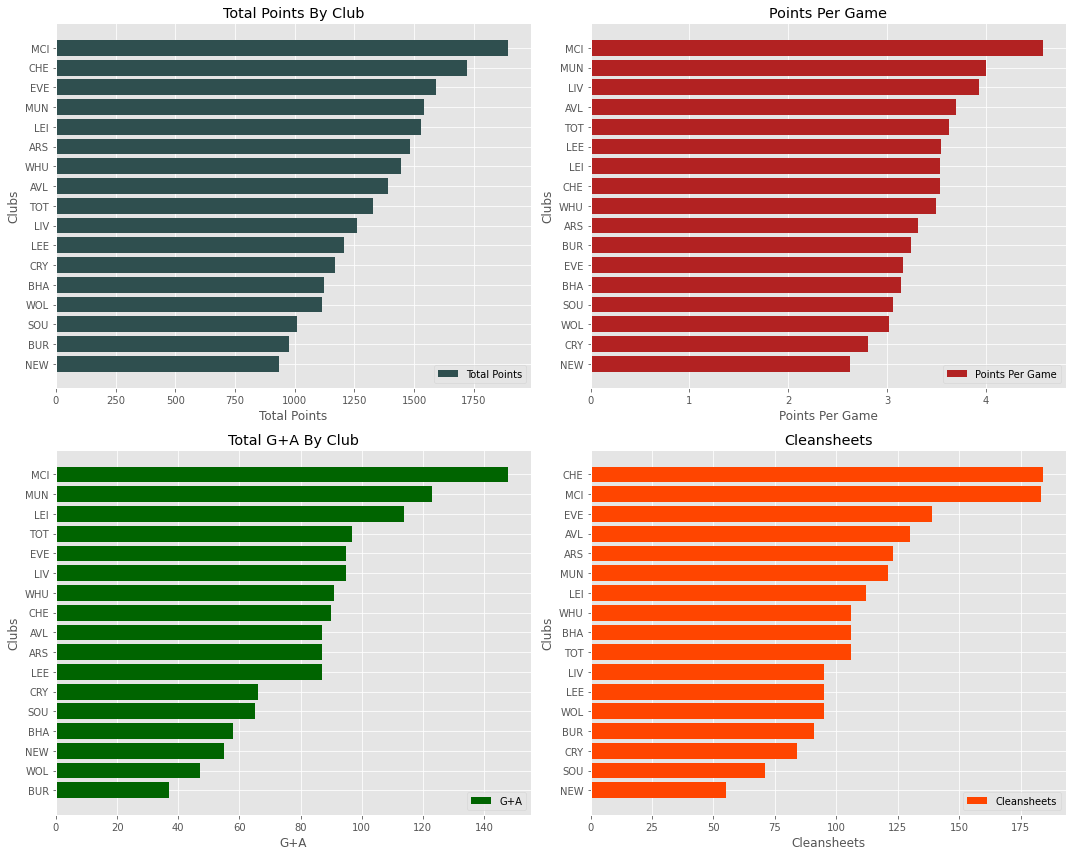

In [22]:
tp_df = slim_df.pivot_table('total_points', index='team', aggfunc='sum').sort_values(by='total_points', ascending=True)
ppg_df = slim_df.pivot_table('points_per_game', index='team', aggfunc='mean').sort_values(by='points_per_game', ascending=True)
att_df = slim_df.pivot_table('G+A', index='team', aggfunc='sum').sort_values(by='G+A', ascending=True)
def_df = slim_df.pivot_table('clean_sheets', index='team', aggfunc='sum').sort_values(by='clean_sheets', ascending=True)

fg, ax = plt.subplots(2, 2, figsize=(15,12))

(ax1, ax2), (ax3, ax4) = ax

#Plot 1
x1 = tp_df.index
y1 = tp_df['total_points']
ax1.barh(x1, y1, label='Total Points', color='#2F4F4F')
ax1.set(title='Total Points By Club', ylabel='Clubs', xlabel='Total Points')
ax1.legend()

#Plot 2
x2 = ppg_df.index
y2 = ppg_df['points_per_game']
ax2.barh(x2, y2, label='Points Per Game', color='#B22222')
ax2.set(title='Points Per Game', ylabel='Clubs', xlabel='Points Per Game')
ax2.legend()

#Plot 3
x3 = att_df.index
y3 = att_df['G+A']
ax3.barh(x3, y3, label='G+A', color='#006400')
ax3.set(title='Total G+A By Club', ylabel='Clubs', xlabel='G+A')
ax3.legend()

#Plot 4
x4 = def_df.index
y4 = def_df['clean_sheets']
ax4.barh(x4, y4, label='Cleansheets', color='#FF4500')
ax4.set(title='Cleansheets', ylabel='Clubs', xlabel='Cleansheets')
ax4.legend()

plt.tight_layout()

The bar charts provide some useful insights on which teams performed well over the 2021/2022. A high performing team is most likely to include high performing players by virtue of goal contributions and defensive contributions which are the cornerstone for picking players. These are the teams where will choose our base squad from which will have our long-term and premium players.

- **Total Points**: Chelsea, Man City, Spurs and Liverpool were the standout performers in this metric.
- Liverpool and Man City players were the only players to average **more than 4 points per game** with Liverpool averaging more than 5 points per game.
- **Attack**: Chelsea, Liverpool, Man City, Spurs, and West Ham were the only clubs to provide more than 100 combined goals and assists.
- **Defence**: Man City, Liverpool, Spurs, Chelsea and Arsenal were the only clubs to provide more than 125 total cleansheets.

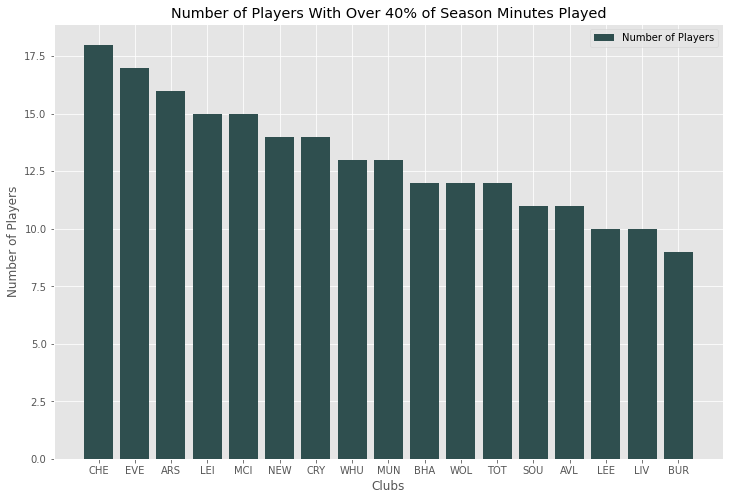

In [23]:
rotation_df = slim_df['team'].value_counts().to_frame()

fg, ax = plt.subplots(figsize=(12,8))

#Plot 
x = rotation_df.index
y = rotation_df['team']
ax.bar(x, y, label='Number of Players', color='#2F4F4F')
ax.set(title='Number of Players With Over 40% of Season Minutes Played', xlabel='Clubs', ylabel='Number of Players')
ax.legend()

To maximize  on potential points, it is always good to choose players that are most likely to start and finish the game. The less players used by a club, the better; as this means that the potential for rotation is very low. 

- Man City, Chelsea and Spurs are some of the high performing teams with high roation meanwhile Liverpool does not roate often.

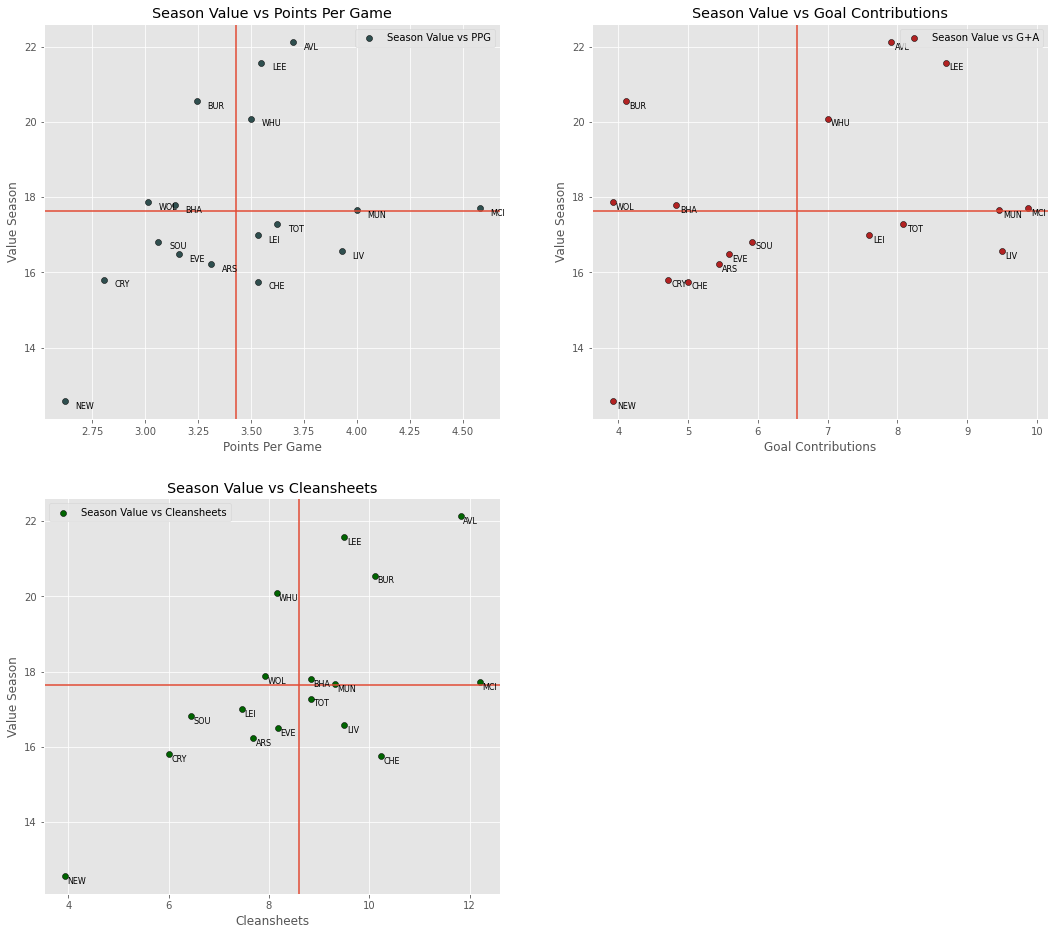

In [24]:
value_df = slim_df.groupby(['team']).aggregate({'value_season': 'mean', 'points_per_game': 'mean'}).sort_values(by='value_season', ascending=False)
def_val_df = slim_df.groupby(['team']).aggregate({'value_season': 'mean', 'clean_sheets': 'mean'}).sort_values(by='value_season', ascending=False)
att_val_df = slim_df.groupby(['team']).aggregate({'value_season': 'mean', 'G+A': 'mean'}).sort_values(by='value_season', ascending=False)

fg, ax = plt.subplots(2,2, figsize=(18,16))

(ax1, ax2), (ax3, ax4) = ax
ax[-1, -1].axis('off')

#Plot 1
x1 = value_df['points_per_game']
y1 = value_df['value_season']
ax1.scatter(x1, y1, label='Season Value vs PPG', edgecolor='black', color='#2F4F4F')
ax1.set(title='Season Value vs Points Per Game', xlabel='Points Per Game', ylabel='Value Season')
ax1.legend()

ann_txt1 = value_df.index
for i, txt1 in enumerate(ann_txt1):
    ax1.annotate(txt1, (x1[i]+.05, y1[i]-.20), fontsize=8)
    

y1_mean = y1.mean()
x1_mean = x1.mean()
ax1.axhline(y1_mean)
ax1.axvline(x1_mean)
    
#Plot 2
x2 = att_val_df['G+A']
y2 = value_df['value_season']
ax2.scatter(x2, y2, label='Season Value vs G+A', edgecolor='black', color='#B22222')
ax2.set(title='Season Value vs Goal Contributions', xlabel='Goal Contributions', ylabel='Value Season')
ax2.legend()

ann_txt2 = att_val_df.index
for i, txt2 in enumerate(ann_txt2):
    ax2.annotate(txt2, (x2[i]+.05, y2[i]-.20), fontsize=8)

y2_mean = y2.mean()
x2_mean = x2.mean()
ax2.axhline(y2_mean)
ax2.axvline(x2_mean)

#Plot 3
x3 = def_val_df['clean_sheets']
y3 = def_val_df['value_season']
ax3.scatter(x3, y3, label='Season Value vs Cleansheets', edgecolor='black', color='#006400')
ax3.set(title='Season Value vs Cleansheets', xlabel='Cleansheets', ylabel='Value Season')
ax3.legend()

y3_mean = y3.mean()
x3_mean = x3.mean()
ax3.axhline(y3_mean)
ax3.axvline(x3_mean)

ann_txt3 = def_val_df.index
for i, txt3 in enumerate(ann_txt3):
    ax3.annotate(txt3, (x3[i]+.05, y3[i]-.20), fontsize=8)

The above scatter plots can be useful for detecting teams that might have high value players flying under the radar. Players from these teams would be great to have as differentials, as well as on the bench. 

The uppermost right quandrant in each scatter plot contains the best value & high-performing teams in each statistical category. These are the teams where we would like to choose our base squad from, which will have our long-term and premium players. We have already identified Liverpool, Chelsea, Man City, Spurs, Arsenal and West Ham as teams that fit this criteria which is why they will be ignored in this section. 

The uppermost left quadrant is the quadrant of interest as this is where the differentials and 'under the radar' players should come from.

- **Overall**: Aston Villa, Crystal Palace, Brentford, and Wolves would have provided good differentials last season.
- **Goal Contributions**: Aston Villa , Crystal Palace and Brentford players performed well going forward.
- **Cleansheets**: Interestingly enough, Aston Villa, Crystal Palace and Wolves performed very well defensively while providing great value. They are all in the uppermost right quadrant.

### Analysis By Position:

Next in our analysis we look at which positions to has the best performing players. This will guide us in structuring our squad and distribution of funds. Similar to investing in stocks, you first choose a market that is performing well and from there you choose specific companies that perform well. This same logic will be applied with positions being the market.

Here we continue with our "**slim_df**" (players with atleast 40% of total season minutes) as these are the only players that will provide any statistical significance. From this dataframe, we will filter and only focus on the players that are above average (50%) in the follwoing statistical categories: Total points, Points per game, Bonus, and Value Season. To be fair, the average for Midfielders will be used to filter Midfielders, Defenders for Defenders and so on so that apples are compared with apples. We will refer to this group as "**high performing players**".

In [25]:
#Get above average players in each position

def get_top_50_pct(data_f, pos_list,):
    players = []
    for pos in pos_list:
        pos_df = data_f[data_f['position'] == pos]
        
        mean_vals = dict(pos_df.describe().loc['50%'][['total_points', 'points_per_game','value_season', 'bonus']])
        
        filt1 = pos_df['total_points'] > mean_vals['total_points']
        filt2 = pos_df['points_per_game'] > mean_vals['points_per_game']
        filt3 = pos_df['value_season'] > mean_vals['value_season']
        filt4 = pos_df['bonus'] > mean_vals['bonus']
        
        above_mean = list(pos_df[filt1 & filt2 & filt3 & filt4]['web_name'])
        
        for player in above_mean:
            players.append(player)
    return players

positions = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']
above_ave_players = get_top_50_pct(slim_df, positions)

top_df = slim_df.set_index('web_name').loc[above_ave_players].reset_index()

In [26]:
#Position value counts
top_df['position'].value_counts()

Midfielder    35
Defender      21
Forward        7
Goalkeeper     5
Name: position, dtype: int64

There are 10 times as many defenders (32) and midfielders (32) as there are forwards (3) and 6 times as many defenders and midfielders as there are goalkeepers (5).

In [ ]:
tp_df = top_df.pivot_table('total_points', index='position', aggfunc='median').sort_values(by='total_points', ascending=False)
ppg_df = top_df.pivot_table('points_per_game', index='position', aggfunc='median').sort_values(by='points_per_game', ascending=False)
val_df = top_df.pivot_table('value_season', index='position', aggfunc='median').sort_values(by='value_season', ascending=False)
bonus_df = top_df.pivot_table('bonus', index='position', aggfunc='median').sort_values(by='bonus', ascending=False)

fg, ax = plt.subplots(2, 2, figsize=(15,12))

(ax1, ax2), (ax3, ax4) = ax

#Plot 1
x1 = tp_df.index
y1 = tp_df['total_points']
ax1.bar(x1, y1, label='Avg Points', color='#2F4F4F')
ax1.set(title='Average Points By Position', ylabel='Position', xlabel='Points')
ax1.legend()

#Plot 2
x2 = ppg_df.index
y2 = ppg_df['points_per_game']
ax2.bar(x2, y2, label='Avg Points Per Game', color='#B22222')
ax2.set(title='Average Points Per Game By Position', ylabel='Position', xlabel='Points Per Game')
ax2.legend()

#Plot 3
x3 = val_df.index
y3 = val_df['value_season']
ax3.bar(x3, y3, label='Avg Value', color='#006400')
ax3.set(title='Average Season Value', ylabel='Position', xlabel='Season Value')
ax3.legend()

#Plot 4
x4 = bonus_df.index
y4 = bonus_df['bonus']
ax4.bar(x4, y4, label='Avg Bonus', color='#FF4500')
ax4.set(title='Average Bonus by Position', ylabel='Position', xlabel='Bonus')
ax4.legend()

plt.tight_layout()

**NOTE**: Statistics only apply to *above average players:

***See section introduction for definition**

- When it comes down to points per game, each position managers atleast 4 points per game.
- Over the course of a season, goalkeepers and defenders generally provide the best value due to their lower price points.
- The FPL bonus points system generally rewards attacking actions more than defensive actions. This gives an advantage to forwards, midfielders and attack-minded defenders. On average forwards scored atleast 3 more bonus points than the other positions.

In [ ]:
#Distribution of points by position
cp = sns.color_palette(['#B22222','#2F4F4F','#006400','#FF4500'])
sns.displot(top_df, x='total_points', hue='position', multiple='stack', stat='frequency', bins=10, palette=cp)

The key takeways from this plot is the heights of the bars. The more times a position's total points is accounted for within a certain range of values, the greater the bar.

- The positions with the majority of high performing players were in the Midfield and Defense.
- Midfielder and Defenders also dominate season points totals greater than 150. Investing heavily in these positions would have yielded great returns over the season. These positions would have been great for long-term investments.
- There were only a few high performing Forwards and Goalkeepers to choose from last season. These positions would have been great for short-term investments based on form or fixtures.
- The outliers in terms of season points totals (> 250 pts) were  Midfielders, which again shows the great points potential that the midfield had last season.

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,12))
(ax1,ax2),(ax3,ax4) = ax

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        #return '{p:.2f}% ({v:})'.format(v=val)
        return '{v:}'.format(v=val)
    return my_autopct
        
colors=['#B22222','#2F4F4F','#006400']
#Plot1
slices1 = top_df.groupby('position')['price_range'].value_counts()['Goalkeeper']
labels1 = top_df.groupby('position')['price_range'].value_counts()['Goalkeeper'].index
ax1.pie(slices1, labels=labels1, wedgeprops={'edgecolor':'black'}, colors=colors, startangle=90, autopct=make_autopct(slices1), shadow=True)
ax1.set(title='Number of Top Goalkeepers')
ax1.legend()

#Plot2
slices2 = top_df.groupby('position')['price_range'].value_counts()['Defender']
labels2 = top_df.groupby('position')['price_range'].value_counts()['Defender'].index
ax2.pie(slices2, labels=labels2, wedgeprops={'edgecolor':'black'}, colors=colors, startangle=90, autopct=make_autopct(slices2), shadow=True)
ax2.set(title='Number of Top Defenders')
ax2.legend()

#PLot3
slices3 = top_df.groupby('position')['price_range'].value_counts()['Midfielder']
labels3 = top_df.groupby('position')['price_range'].value_counts()['Midfielder'].index
ax3.pie(slices3, labels=labels3, wedgeprops={'edgecolor':'black'}, colors=colors, startangle=90, autopct=make_autopct(slices3), shadow=True)
ax3.set(title='Number of Top Midfielders')
ax3.legend()

#Plot4
slices4 = top_df.groupby('position')['price_range'].value_counts()['Forward']
labels4 = top_df.groupby('position')['price_range'].value_counts()['Forward'].index
ax4.pie(slices4, labels=labels4, wedgeprops={'edgecolor':'black'}, colors=colors, startangle=90, autopct=make_autopct(slices4), shadow=True)
ax4.set(title='Number of Top Forwards')
ax4.legend()

When a FPL Manager builds their squad, they have to spread their buget between premium players, mid-priced players and budget players.  The composition of your squad has some influence on how many points you will get at the end of the season. A well-balanced team will always outperform a top-heavy team littered with buget fillers.

In the above plot we are interested in the composition of high performing players in each position. This will help in squad composition and will influence your formation.

- The Defense is where you would have wanted to spend the most money on premium players (atleast 3) followed by the Midfield.
- The Defense is also where you would have found the most variety in budget players
- The Midfield would have been best composed with mid-price players and 1 or 2 premium players


### Analysis By Player:

Now that we have a rough idea of where to look (club and position) for the high performing players, we can start analyzing the players to see what insights we can get from the data.

In [ ]:
#Correlation between different variables
corr_df = top_df[['G+A', 'points_per_game',
       'selected_by_percent', 'total_points', 'value_season',
       'minutes', 'goals_scored', 'assists', 'clean_sheets',
      'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index'
       ]].corr()

f, ax = plt.subplots(figsize=(15,10))
#Configure custom diverging colormap
cmap = sns.diverging_palette(230,20, as_cmap=True)
#Draw map
sns.heatmap(corr_df, annot=True, cmap=cmap)

Here we are interested in the attributes that have dark shades of red or blue in the **total points** row as these have moderate to strong positive/negative correlation. We will only choose the top 4 attributes to plot against the total points attributes.

- Points Per Game
- Influence
- Bonus
- ICT Index

In [ ]:
ppg_df = top_df.groupby(['web_name']).aggregate({'total_points': 'mean', 'points_per_game': 'mean'}).sort_values(by='total_points', ascending=False)
inf_df = top_df.groupby(['web_name']).aggregate({'total_points': 'mean', 'influence': 'mean'}).sort_values(by='total_points', ascending=False)
bon_df = top_df.groupby(['web_name']).aggregate({'total_points': 'mean', 'bonus': 'mean'}).sort_values(by='total_points', ascending=False)
ict_df = top_df.groupby(['web_name']).aggregate({'total_points': 'mean', 'ict_index': 'mean'}).sort_values(by='total_points', ascending=False)

fg, ax = plt.subplots(4,1, figsize=(15,40))

ax1, ax2, ax3, ax4 = ax
#ax[-1, -1].axis('off')

#Plot 1
x1 = ppg_df['points_per_game']
y1 = ppg_df['total_points']
ax1.scatter(x1, y1, label='Total Points vs PPG', edgecolor='black', color='#2F4F4F')
ax1.set(title='Total Points vs PPG', xlabel='Points Per Game', ylabel='Total Points')
ax1.legend()

ann_txt1 = ppg_df.index
for i, txt1 in enumerate(ann_txt1):
    ax1.annotate(txt1, (x1[i]+.05, y1[i]-.20), fontsize=8)
    

y1_mean = y1.mean()
x1_mean = x1.mean()
ax1.axhline(y1_mean)
ax1.axvline(x1_mean)
    
#Plot 2
x2 = inf_df['influence']
y2 = inf_df['total_points']
ax2.scatter(x2, y2, label='Influence vs Total Points', edgecolor='black', color='#B22222')
ax2.set(title='Influence vs Total Points', xlabel='Influence', ylabel='Total Points')
ax2.legend()

ann_txt2 = inf_df.index
for i, txt2 in enumerate(ann_txt2):
    ax2.annotate(txt2, (x2[i]+.05, y2[i]-.20), fontsize=9)

y2_mean = y2.mean()
x2_mean = x2.mean()
ax2.axhline(y2_mean)
ax2.axvline(x2_mean)

#Plot 3
x3 = bon_df['bonus']
y3 = bon_df['total_points']
ax3.scatter(x3, y3, label='Bonus vs Total Points', edgecolor='black', color='#006400')
ax3.set(title='Bonus vs Total Points', xlabel='Bonus', ylabel='Total Points')
ax3.legend()

y3_mean = y3.mean()
x3_mean = x3.mean()
ax3.axhline(y3_mean)
ax3.axvline(x3_mean)

ann_txt3 = bon_df.index
for i, txt3 in enumerate(ann_txt3):
    ax3.annotate(txt3, (x3[i]+.05, y3[i]-.20), fontsize=8)

#Plot 4
x4 = ict_df['ict_index']
y4 = ict_df['total_points']
ax4.scatter(x4, y4, label='ICT Index vs Total Points', edgecolor='black', color='#FF4500')
ax4.set(title='ICT Index vs Total Points', xlabel='ICT Index', ylabel='Total Points')
ax4.legend()

y4_mean = y4.mean()
x4_mean = x4.mean()
ax4.axhline(y4_mean)
ax4.axvline(x4_mean)

ann_txt4 = ict_df.index
for i, txt4 in enumerate(ann_txt4):
    ax4.annotate(txt4, (x4[i]+.05, y4[i]-.20), fontsize=8)

In each of the four plots, we have divided the graphs into four quadrants based on the mean of the x and y values. Here we  are most interested in the players in the the top half of the plots. The top-right quadrants contains the players that our base squad will most likely be made up of while the top-left quadrants contain the players who will make great differentials. This is by no means to say that players in the bottom half of the graphs should not be considered as they are still part of the high performing players dataframe. The plots, however, do act as a guide when making final decisions.

Key takeaways:
- **TP vs PPG**: The upper-right quadrant is dominated by mid-priced midfielders and premium defenders which is consistent with our analysis for high performing positions and price brackets
- **TP vs Influence**: Players with high influence are the ones who are most likely to have the greatest impact on their teams outcomes. In the upper-right quadrant we find some of the best differentials from otherwise smaller teams such as Sa(Wolves), Gallagher(Palace) and Toney(Brentford).
- **TP vs Bonus**: Bonus points can help to give you the edge in tight gameweeks. Here we see that midfielders and defenders dominate the upper-right quandrant while Alisson is the only goalkeeper in this quadrant.
- **TP vs ICT Index**: This graph tells us that ICT Index is only useful for assessing forwards, midfielders and attacking defenders as there are no centre-backs in the upper-right quadrant. High performing centre backs are found in the upper-left quadrant.

### Squad Selection:

The final part is the squad selection based on the Points Per Game, Influence, Bonus and Value Season. We will build four different squads of 15 with high ranking players from each category. The maximum number of players per position constraint will be observed, however, the budget and maximum number of players per team will not. 

**Points Per Game Squad**

In [ ]:
g = top_df[top_df['position'] == 'Goalkeeper'].sort_values(by='points_per_game', ascending=False).head(2)
d = top_df[top_df['position'] == 'Defender'].sort_values(by='points_per_game', ascending=False).head(5)
m = top_df[top_df['position'] == 'Midfielder'].sort_values(by='points_per_game', ascending=False).head(5)
f = top_df[top_df['position'] == 'Forward'].sort_values(by='points_per_game', ascending=False).head(3)

squad1_df = pd.concat([g,d,m,f])
squad1_df

**Value Season Squad**

In [ ]:
g = top_df[top_df['position'] == 'Goalkeeper'].sort_values(by='value_season', ascending=False).head(2)
d = top_df[top_df['position'] == 'Defender'].sort_values(by='value_season', ascending=False).head(5)
m = top_df[top_df['position'] == 'Midfielder'].sort_values(by='value_season', ascending=False).head(5)
f = top_df[top_df['position'] == 'Forward'].sort_values(by='value_season', ascending=False).head(3)

squad2_df = pd.concat([g,d,m,f])
squad2_df

**Influence Squad**

In [ ]:
g = top_df[top_df['position'] == 'Goalkeeper'].sort_values(by='influence', ascending=False).head(2)
d = top_df[top_df['position'] == 'Defender'].sort_values(by='influence', ascending=False).head(5)
m = top_df[top_df['position'] == 'Midfielder'].sort_values(by='influence', ascending=False).head(5)
f = top_df[top_df['position'] == 'Forward'].sort_values(by='influence', ascending=False).head(3)

squad3_df = pd.concat([g,d,m,f])
squad3_df

**Bonus Points Squad**

In [ ]:
g = top_df[top_df['position'] == 'Goalkeeper'].sort_values(by='bonus', ascending=False).head(2)
d = top_df[top_df['position'] == 'Defender'].sort_values(by='bonus', ascending=False).head(5)
m = top_df[top_df['position'] == 'Midfielder'].sort_values(by='bonus', ascending=False).head(5)
f = top_df[top_df['position'] == 'Forward'].sort_values(by='bonus', ascending=False).head(3)

squad4_df = pd.concat([g,d,m,f])
squad4_df

The four different squads allows us to assess the different options and compare the players using multiple categories to better optimize the final squad.

In [ ]:
print('PPG:', squad1_df['price'].sum())
print('Value Season:', squad2_df['price'].sum())
print('Influence:', squad3_df['price'].sum())
print('Bonus' ,squad4_df['price'].sum())

## Conclusion:

- We identified Liverpool, Chelsea, Man City, Spurs, Arsenal and West Ham as the best performing teams 
- Aston Villa, Crystal Palace, Brentford, and Wolves were identified as the teams with the best differentials last season.
- High investments in the defense and midfield would have yielded the best returns over the course of last season.
- Liverpool had the most high performing players in three out of four player squads.
- Salah and Son were by far the best performing players last season.
- Cash, Gallagher, Toney, Coady, Sa and Ward-Prowse were some of the best differential picks of the season.
